<a href="https://colab.research.google.com/github/chabelicastano/cap4770-spring23/blob/main/Projects/ChabeliCastano_P02_Crate%26Barrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read both csvs files - there were previously added to the runtime

#import pandas
import pandas as pd

In [ ]:
#test (the provided test set)
test_orig = pd.read_csv('test.csv')
test_orig.set_index('id', inplace=True, verify_integrity=True)
test_orig

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144365,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144366,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0


In [ ]:
#check for null values
test_orig.isnull().values.any()

False

In [ ]:
# the provided train set
train_orig = pd.read_csv('train.csv')
train_orig.set_index('id', inplace=True, verify_integrity=True)
train_orig

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


In [ ]:
#check for null values
train_orig.isnull().values.any()

False

In [ ]:
# to take a look at the distribution of targets
# I know I could've simpliefied the steps but I used it as a learning opportunity
class_count = train_orig['target'].value_counts()
class_count_df = pd.DataFrame({'class': class_count.index, 'count': class_count.values})
class_count_df

,class,count
0,Class_2,16122
1,Class_6,14135
2,Class_8,8464
3,Class_3,8004
4,Class_9,4955
5,Class_7,2839
6,Class_5,2739
7,Class_4,2691
8,Class_1,1929


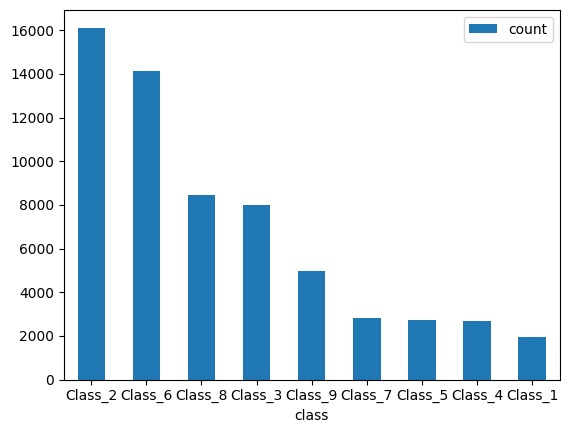

In [ ]:
# bar chart
import matplotlib.pyplot as plt
ax = class_count_df.plot.bar(x='class', y='count', rot=0)

In [ ]:
# to use xgboost, we need the output variables to be numeric

# I was tempted to use the LabelEncoder, but then I realized that the encodings 
# wouldn't correspond to the assigned labels. For example Class_1 wouldn't 
# necessarily encode as 1. I was not sure of the exact order on the df.
from sklearn.preprocessing import LabelEncoder

# to make sure that the encoding is related to the class number. Then I got an error
# related to XGBClassifier, saying that clasees have to start at 0. I redid the mapping
base = 'Class_'
custom_mapping = {}

for i in range(1, 10):
  key = base + str(i)
  custom_mapping[key] = i-1

custom_mapping

{'Class_1': 0,
 'Class_2': 1,
 'Class_3': 2,
 'Class_4': 3,
 'Class_5': 4,
 'Class_6': 5,
 'Class_7': 6,
 'Class_8': 7,
 'Class_9': 8}

In [ ]:
# Change the values in the target column
train_orig['target'] = train_orig['target'].map(custom_mapping)
train_orig

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,8
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,8
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,8


In [ ]:
# prepare for the features and labels

#get the column names
train_orig_col = list(train_orig.columns)
train_orig_col

['feat_1',
 'feat_2',
 'feat_3',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_8',
 'feat_9',
 'feat_10',
 'feat_11',
 'feat_12',
 'feat_13',
 'feat_14',
 'feat_15',
 'feat_16',
 'feat_17',
 'feat_18',
 'feat_19',
 'feat_20',
 'feat_21',
 'feat_22',
 'feat_23',
 'feat_24',
 'feat_25',
 'feat_26',
 'feat_27',
 'feat_28',
 'feat_29',
 'feat_30',
 'feat_31',
 'feat_32',
 'feat_33',
 'feat_34',
 'feat_35',
 'feat_36',
 'feat_37',
 'feat_38',
 'feat_39',
 'feat_40',
 'feat_41',
 'feat_42',
 'feat_43',
 'feat_44',
 'feat_45',
 'feat_46',
 'feat_47',
 'feat_48',
 'feat_49',
 'feat_50',
 'feat_51',
 'feat_52',
 'feat_53',
 'feat_54',
 'feat_55',
 'feat_56',
 'feat_57',
 'feat_58',
 'feat_59',
 'feat_60',
 'feat_61',
 'feat_62',
 'feat_63',
 'feat_64',
 'feat_65',
 'feat_66',
 'feat_67',
 'feat_68',
 'feat_69',
 'feat_70',
 'feat_71',
 'feat_72',
 'feat_73',
 'feat_74',
 'feat_75',
 'feat_76',
 'feat_77',
 'feat_78',
 'feat_79',
 'feat_80',
 'feat_81',
 'feat_82',
 'feat_83',
 'feat_84',
 

In [ ]:
#drop 'target'
train_orig_col.remove('target')
train_orig_col

['feat_1',
 'feat_2',
 'feat_3',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_8',
 'feat_9',
 'feat_10',
 'feat_11',
 'feat_12',
 'feat_13',
 'feat_14',
 'feat_15',
 'feat_16',
 'feat_17',
 'feat_18',
 'feat_19',
 'feat_20',
 'feat_21',
 'feat_22',
 'feat_23',
 'feat_24',
 'feat_25',
 'feat_26',
 'feat_27',
 'feat_28',
 'feat_29',
 'feat_30',
 'feat_31',
 'feat_32',
 'feat_33',
 'feat_34',
 'feat_35',
 'feat_36',
 'feat_37',
 'feat_38',
 'feat_39',
 'feat_40',
 'feat_41',
 'feat_42',
 'feat_43',
 'feat_44',
 'feat_45',
 'feat_46',
 'feat_47',
 'feat_48',
 'feat_49',
 'feat_50',
 'feat_51',
 'feat_52',
 'feat_53',
 'feat_54',
 'feat_55',
 'feat_56',
 'feat_57',
 'feat_58',
 'feat_59',
 'feat_60',
 'feat_61',
 'feat_62',
 'feat_63',
 'feat_64',
 'feat_65',
 'feat_66',
 'feat_67',
 'feat_68',
 'feat_69',
 'feat_70',
 'feat_71',
 'feat_72',
 'feat_73',
 'feat_74',
 'feat_75',
 'feat_76',
 'feat_77',
 'feat_78',
 'feat_79',
 'feat_80',
 'feat_81',
 'feat_82',
 'feat_83',
 'feat_84',
 

In [ ]:
#features
features = train_orig[train_orig_col]
features

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61875,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61876,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0


In [ ]:
#labels
labels = train_orig['target']
labels

id
1        0
2        0
3        0
4        0
5        0
        ..
61874    8
61875    8
61876    8
61877    8
61878    8
Name: target, Length: 61878, dtype: int64

In [ ]:
# divide the train_orig into train and test set (in order to test the classifier)
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size = 0.8, random_state=1, stratify=labels)

In [ ]:
# let's check the correlation of the features in the orig df - just to have an idea
# anyways, since we don't have further info on the features, we shouldn't drop any of them
tg_correlation = list(train_orig.corrwith(train_orig['target']))
tg_correlation

[0.07298405455985246,
 0.19173852070527445,
 0.14872916389808188,
 0.15345819989216172,
 0.03603411624730647,
 0.037115944532000546,
 0.14217197978933735,
 0.2097251577684207,
 -0.17535026880595458,
 0.09538264931491208,
 0.18955143103705935,
 0.08256650639415516,
 0.1942000703483919,
 -0.36509215149492097,
 -0.2590474020078893,
 -0.004812087786255791,
 0.13274115531352187,
 0.20080460299038994,
 0.1315492202772373,
 0.2199085140711416,
 0.013486063312228444,
 0.2005452395495726,
 0.1042587732141679,
 0.2269362281304017,
 -0.2940787250160381,
 0.14161744619625397,
 0.10328791832019461,
 0.13655348202086262,
 0.12253265997110305,
 0.018936520331034323,
 0.10705948590307282,
 0.0156765552248972,
 -0.17934743507742554,
 0.018999093870521858,
 0.1450416247222801,
 0.22654902735561203,
 0.1352833399210001,
 0.19989481436848164,
 0.09183224022197119,
 -0.33011447289188783,
 0.20550504574332726,
 0.12508365272676758,
 -0.12222602912836847,
 0.13921285883499002,
 0.06406265280835,
 0.118515019

At the beginning I tried an approach using Bayesian search, and it took forever. I assume that it was due to my lack of knowledge/experience about it (I just read about and tried to implement it). In different circumstances, I would spend more time trying to debug and get a hang of it, but I'm kinda in a hurry. Thus, since I had already done some experimentation with random search, I decided to use it.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
from hyperopt import hp
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, fmin, tpe, Trials

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from skopt import BayesSearchCV, space, plots

In [ ]:
# classifier
gbc = XGBClassifier(objective='multi:softprob')

In [ ]:
#check gpu
!nvidia-smi

Thu Apr 13 16:45:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |    617MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# define the params

params = {'learning_rate': [0.001, 0.1, 1],
          'max_depth': [5, 7, 9, 11, 13],
          'n_estimators': np.arange(300, 600, 50),
          'min_split_loss':[0.01, 0.1, 1, 2],
          'tree_method': ['gpu_hist'],
          'eval_metric': ['logloss']
          }


In [ ]:
#import stratified kfold
from sklearn.model_selection import StratifiedKFold

#create the object
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#define randomsearch
random_search = RandomizedSearchCV(estimator=gbc,
                           param_distributions=params,
                           n_iter = 10,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1)

In [ ]:
#fit the random_search
random_search.fit(train_features, train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importa...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_jobs=-1,
                   param_distributions={'eval_metric': ['logloss'],
                                        'learning_rate': [0.001, 0.1, 1],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'min_split_loss': [0.01, 0.1, 1, 2],
                                        'n_estimators': array([300, 350, 400, 450, 500, 550]),
                                        'tree_method': ['gpu_hist']},
                   verbose=1)

In [ ]:
#Let's check which were the best parameters
random_search.best_params_

{'tree_method': 'gpu_hist',
 'n_estimators': 550,
 'min_split_loss': 0.1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'eval_metric': 'logloss'}

In [ ]:
#Let's predict
predictions = random_search.best_estimator_.predict(test_features)

In [ ]:
#import for the accuracy
from sklearn.metrics import accuracy_score
#Finally, let's calculate the accuracy of the results
accuracy = accuracy_score(test_labels, predictions)
print('The accuracy score is: {:.4f}'.format(accuracy))

The accuracy score is: 0.8142


In [ ]:
predictions

array([1, 7, 5, ..., 8, 5, 1])

In [ ]:
# now, let's do the predictions on the test.csv
test_orig

In [ ]:
predictions_orig = random_search.best_estimator_.predict(test_orig)
predictions_orig

array([3, 5, 5, ..., 1, 3, 1])

In [ ]:
predictions_orig.shape

(144368,)

In [ ]:
# create a df to save the predictions and export it to kaggle as a csv
submission = pd.DataFrame({'pred_classification': predictions_orig})
# I'm changin the index to start at 1 since the submission example in kaggle has it that way
submission.index += 1
submission

,pred_classification
1,3
2,5
3,5
4,1
5,8
...,...
144364,0
144365,2
144366,1
144367,3


In [ ]:
# Now, we need to apply one hot encoding to get the required format
def dummy_oh(df, column_name):
  df_out = df
  df_out = df_out.join(pd.get_dummies(df_out[column_name], prefix='Class'))
  df_out = df_out.drop(column_name, axis=1)
  return df_out

In [ ]:
#get the dummies
submission2 = dummy_oh(submission,'pred_classification')
submission2

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
144364,1,0,0,0,0,0,0,0,0
144365,0,0,1,0,0,0,0,0,0
144366,0,1,0,0,0,0,0,0,0
144367,0,0,0,1,0,0,0,0,0


In [ ]:
col_names = submission2.columns
col_names

Index(['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5',
       'Class_6', 'Class_7', 'Class_8'],
      dtype='object')

In [ ]:
# to change back the column names starting at 1 instead of 0
new_col_names = []
for cn in col_names:
  num = int(cn[-1])
  new_num = num + 1
  n_cn = cn.replace(str(num), str(new_num))
  new_col_names.append(n_cn)

new_col_names
  

['Class_1',
 'Class_2',
 'Class_3',
 'Class_4',
 'Class_5',
 'Class_6',
 'Class_7',
 'Class_8',
 'Class_9']

In [ ]:
submission2.columns = new_col_names
submission2

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
144364,1,0,0,0,0,0,0,0,0
144365,0,0,1,0,0,0,0,0,0
144366,0,1,0,0,0,0,0,0,0
144367,0,0,0,1,0,0,0,0,0


In [ ]:
# df to csv
submission2.to_csv('cc_submission.csv')

Find below an screenshot of my submission to Kaggle

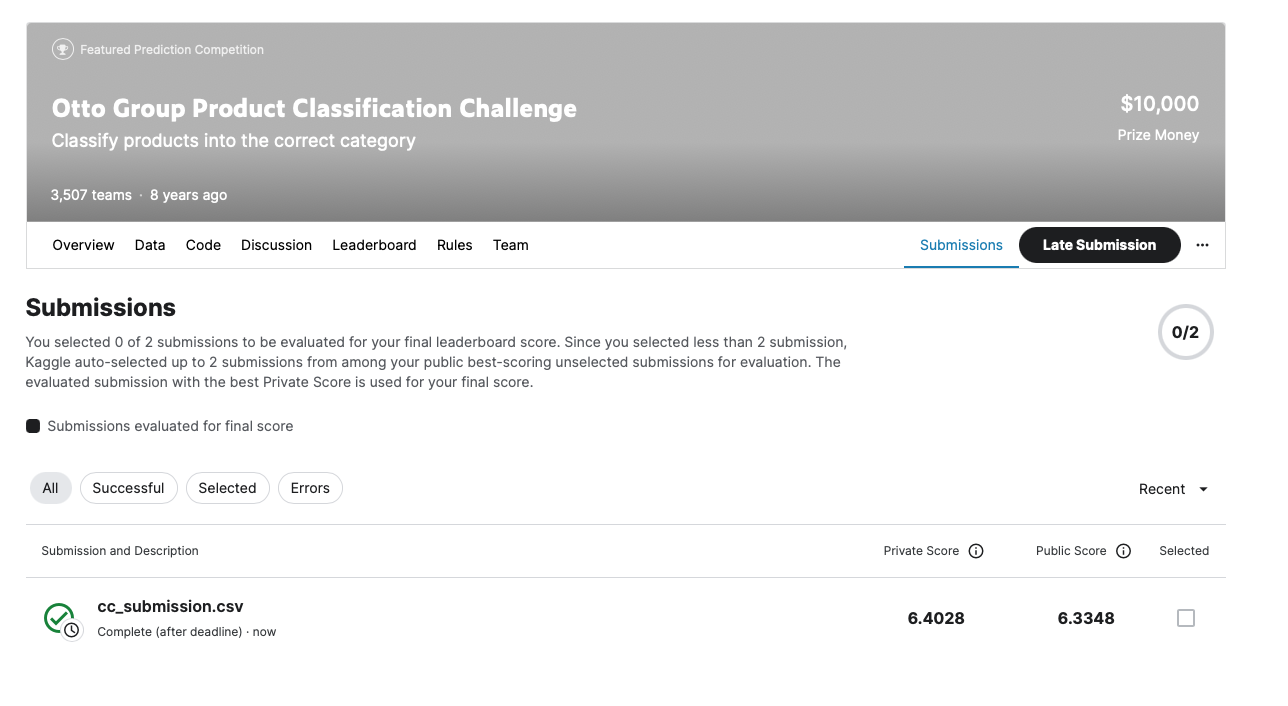